Hola **Carlos**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/datasets/taxi.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [3]:
# cambio de tipo de dato to datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.sort_index()

# para conocer si el orden de los datos está en orden cronológico
print(df.index.is_monotonic_increasing) 
df.info()

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<AxesSubplot:xlabel='datetime'>

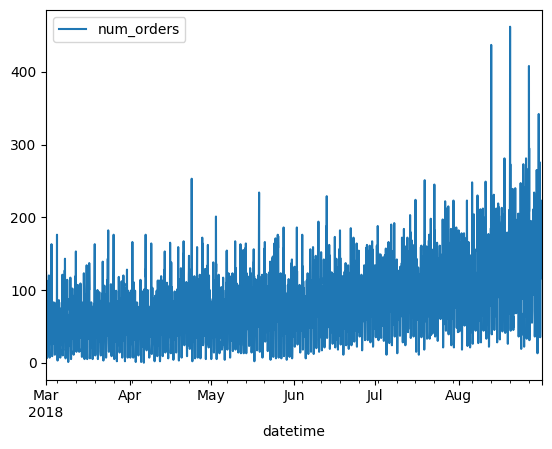

In [4]:
df = df.resample('1H').sum()
df.plot()

## Análisis

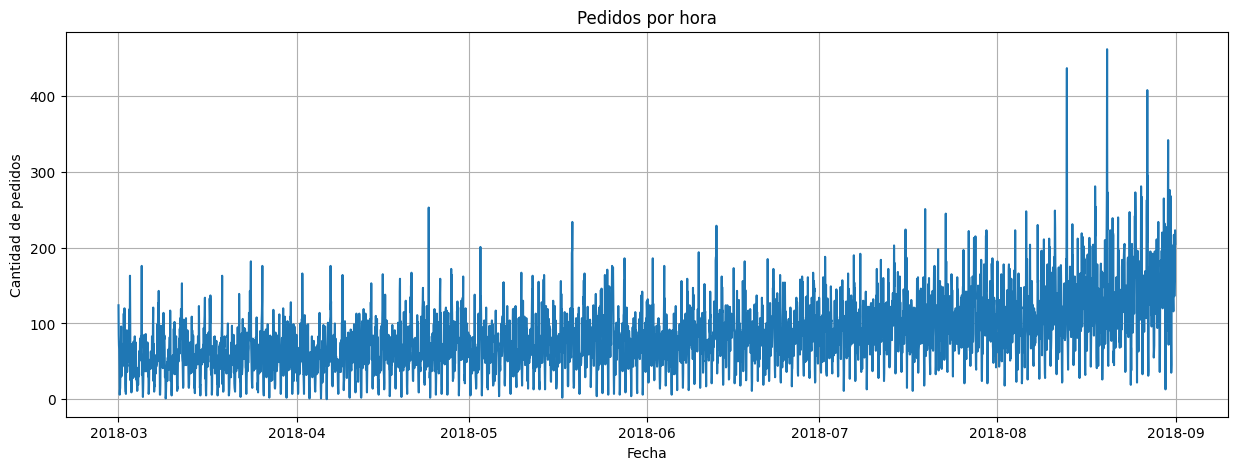

In [5]:
# Gráfico de la serie temporal completa
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['num_orders'])
plt.title('Pedidos por hora')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.grid(True)
plt.show()

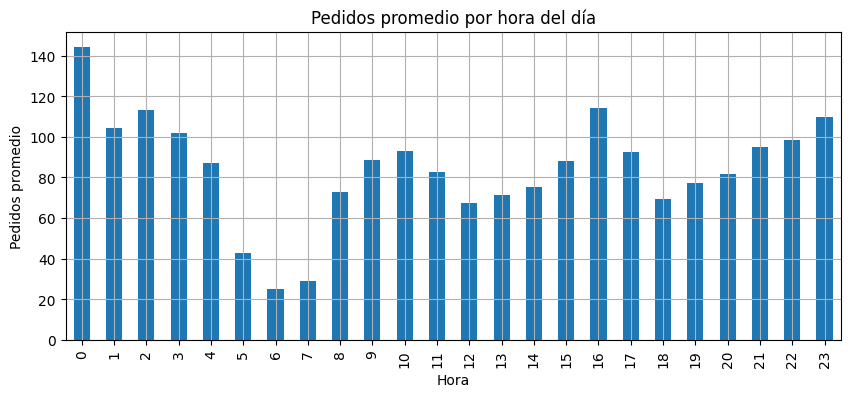

In [6]:
df['hour'] = df.index.hour

# Pedidos promedio por hora del día
plt.figure(figsize=(10, 4))
df.groupby('hour')['num_orders'].mean().plot(kind='bar')
plt.title('Pedidos promedio por hora del día')
plt.xlabel('Hora')
plt.ylabel('Pedidos promedio')
plt.grid(True)
plt.show()


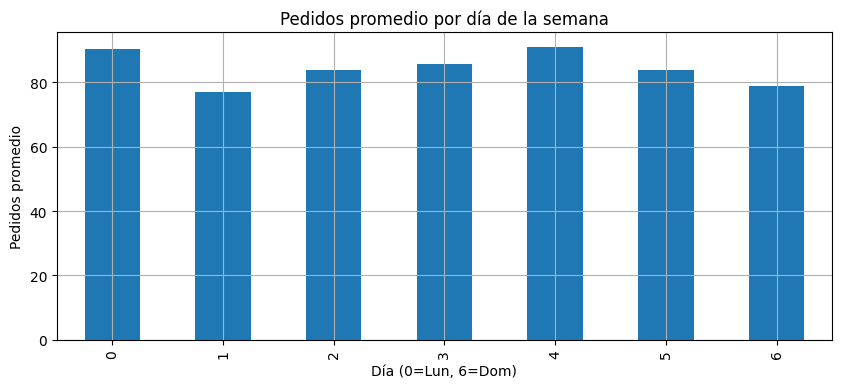

In [7]:
df['day_of_week'] = df.index.dayofweek  # 0 = lunes, 6 = domingo

# Pedidos promedio por día de la semana
plt.figure(figsize=(10, 4))
df.groupby('day_of_week')['num_orders'].mean().plot(kind='bar')
plt.title('Pedidos promedio por día de la semana')
plt.xlabel('Día (0=Lun, 6=Dom)')
plt.ylabel('Pedidos promedio')
plt.grid(True)
plt.show()

In [8]:
df['num_orders'].describe()

count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64

Text(0.5, 1.0, 'Residuales')

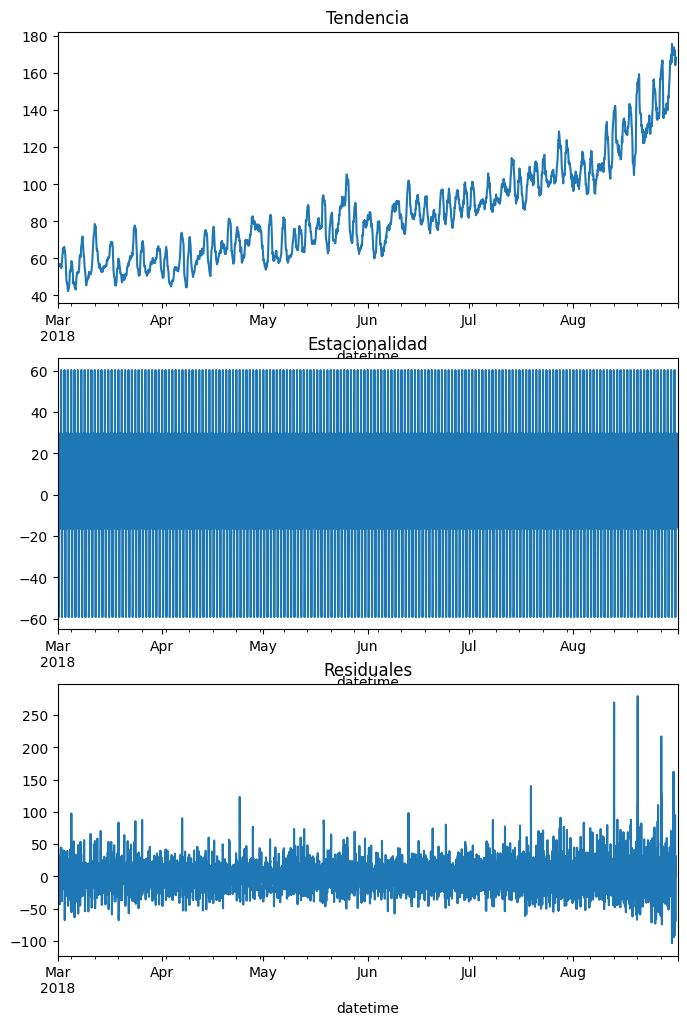

In [9]:
decomposed = seasonal_decompose(df['num_orders'])

plt.figure(figsize=(8, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendencia')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Estacionalidad')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuales')

Para lo evidenciado anteriormente:
- Trend (tendencia): muestra que a largo pazo tiende a subir el número de ordenes.
- Seasonal (estacionalidad): Se evidencian los ciclos repetitivos a lo largo del tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las gráficas! Generaste las gráficas adecuadas considerando que los datos a analizar son sobre series temporales
</div>

## Formación

In [10]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

In [11]:
def temporal(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek  # 0=Lunes, 6=Domingo
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return df

# Aplicar a train y test
train = temporal(train)
test = temporal(test)

# Verificamos
print(train.head())

                     num_orders  hour  day_of_week  is_weekend
datetime                                                      
2018-03-01 00:00:00         124     0            3           0
2018-03-01 01:00:00          85     1            3           0
2018-03-01 02:00:00          71     2            3           0
2018-03-01 03:00:00          66     3            3           0
2018-03-01 04:00:00          43     4            3           0


## Prueba

In [12]:
features = ['hour', 'day_of_week', 'is_weekend']
target = 'num_orders'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [13]:
# Entrenamiento modelo de regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

# Calculo RMSE para regresión lineal
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print(f"RMSE Regresión Lineal: {rmse_linear:.2f}")

RMSE Regresión Lineal: 84.64


In [14]:
# Entrenamiento modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=92124)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Calculo RMSE para entrenamiento modelo árbol
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f"RMSE Árbol de Decisión: {rmse_tree:.2f}")

RMSE Árbol de Decisión: 74.40


In [15]:
# Entrenamiento modelo RandomForest
forest = RandomForestRegressor(n_estimators=100, random_state=92124)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Calculo RMSE para entrenamiento modelo RandomForest
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print(f"RMSE Random Forest: {rmse_forest:.2f}")

RMSE Random Forest: 74.33


In [16]:
print(f"RMSE Regresión Lineal     : {rmse_linear:.2f}")
print(f"RMSE Árbol de Decisión    : {rmse_tree:.2f}")
print(f"RMSE Random Forest        : {rmse_forest:.2f}")

RMSE Regresión Lineal     : 84.64
RMSE Árbol de Decisión    : 74.40
RMSE Random Forest        : 74.33


Debido a que la primera prueba nos da un RMSE mayor al esperado, se sugiere realizar unas mejoras para visualizar cambios en los módelos. 

In [17]:
def temporal(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek  # 0=Lunes, 6=Domingo
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return df

In [18]:
def agregar_lags(df, lags=[1, 24]):
    for lag in lags:
        df[f'lag_{lag}'] = df['num_orders'].shift(lag)
    return df

def agregar_rolling_mean(df, window=24):
    df[f'rolling_mean_{window}'] = df['num_orders'].shift(1).rolling(window=window).mean()
    return df

In [19]:
# Copia inicial
df_final_test = df.copy()

# Aplicación de características temporales
df_final_test = temporal(df_final_test)

# Agregando lags y rolling_mean
df_final_test = agregar_lags(df_final_test)
df_final_test = agregar_rolling_mean(df_final_test)

# Eliminar filas con valores nulos por los lags/rolling
df_final_test.dropna(inplace=True)

In [20]:
# división train y test
train, test = train_test_split(df_final_test, shuffle=False, test_size=0.1)

features = ['hour', 'day_of_week', 'is_weekend', 'lag_1', 'lag_24', 'rolling_mean_24']
X_train = train[features]
y_train = train['num_orders']
X_test = test[features]
y_test = test['num_orders']

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste los ajustes de las características en el dataset de manera adecuada para obtener un buen desempeño en los entrenamientos
    
</div>

In [21]:
# segundo entrenamiento modelo regresión linear
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

# Calculo RMSE para segundo entrenamiento modelo regresión lineal
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print(f"RMSE Regresión Lineal 2: {rmse_linear:.2f}")

RMSE Regresión Lineal 2: 47.20


In [22]:
# Segundo entrenamiento modelo regresión linear
tree = DecisionTreeRegressor(random_state=92124)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Calculo RMSE para segundo entrenamiento modelo árbol
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f"RMSE Árbol de Decisión 2: {rmse_tree:.2f}")

RMSE Árbol de Decisión 2: 57.94


In [23]:
# Segundo entrenamiento modelo RandomForest
forest = RandomForestRegressor(n_estimators=100, random_state=92124)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Calculo RMSE para segundo entrenamiento modelo RandomForest
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print(f"RMSE Random Forest: {rmse_forest:.2f}")

RMSE Random Forest: 46.46


In [24]:
print(f"RMSE Regresión Lineal 2     : {rmse_linear:.2f}")
print(f"RMSE Árbol de Decisión 2   : {rmse_tree:.2f}")
print(f"RMSE Random Forest 2       : {rmse_forest:.2f}")

RMSE Regresión Lineal 2     : 47.20
RMSE Árbol de Decisión 2   : 57.94
RMSE Random Forest 2       : 46.46


# Conclusión

En este proyecto para Sweet Lift Taxi, vimos que los modelos iniciales tenían un error alto al predecir la cantidad de pedidos por hora. Al agregar nuevas características que usan información de horas anteriores (lags) y el promedio de las últimas 24 horas (rolling_mean), los modelos presentaton una mejoría notable.

Debido a esto, en el segundo entrenamiento, dos de los modelos lograron predecir un RMSE (RECM) con un error menor a 48, que era el objetivo principal del proyecto. Esto indica que al tener en cuenta datos pasados y promedios ayuda a generar mejores predicciones cuando se trabaja con series de tiempo.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Carlos, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
    
   
Este proyecto es uno donde se ve claramente la importancia de darle características o variables adecuadas a los modelos para obtener un correcto desempeño, si quitas o pones más variables el desempeño del modelo variará para bien o para mal según la calidad de las mismas. Saludos!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [X]  El código no tiene errores
- [X]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [X]  	
Los datos han sido descargados y preparados.
- [X]  Se ha realizado el paso 2: los datos han sido analizados
- [X]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [X]  Se han evaluado los modelos. Se expuso una conclusión
- [X] La *RECM* para el conjunto de prueba no es más de 48